Bitte das handschriftliche als Abgabe werten. Wäre der Weg im Notebook auch legitim gewesen?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(100,)
(100, 10000)


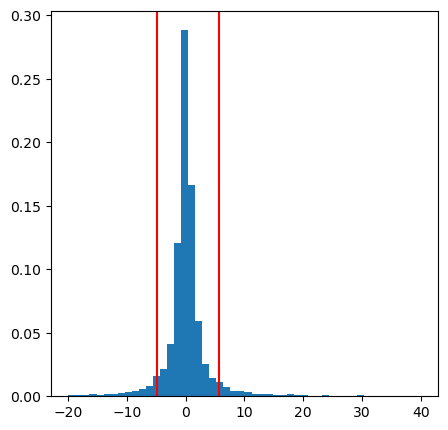

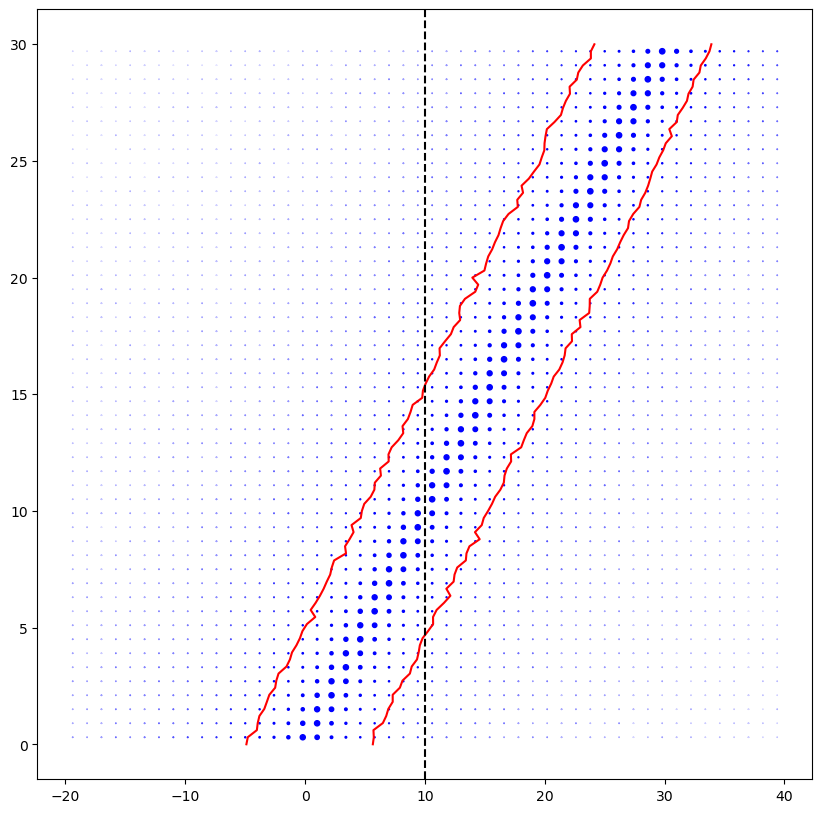

In [18]:

def func(x, a):
    return 1/np.pi * 1/(1+(x-a)**2)


def sample(a, n):
    x = np.random.uniform(-20, 40, n)
    y = np.random.uniform(0, 1, n)
    output = x[y < func(x, a)]
    while len(output) < n:
        x = np.random.uniform(-20, 40, n)
        y = np.random.uniform(0, 1, n)
        output = np.concatenate((output, x[y < func(x, a)]))
    return output[:n]
    

n = 10000
a = np.linspace(0, 30, 100)
x = np.zeros((len(a), n))

for i in range(len(a)):
    x[i] = sample(a[i], n)
print(a.shape)
print(x.shape)


low = np.percentile(x, 5, axis=1)
high = np.percentile(x, 95, axis=1)

plt.figure(figsize=(5, 5))
plt.hist(x[0], bins=50, density=True)

plt.axvline(np.percentile(x[0], 5), color='r')
plt.axvline(np.percentile(x[0], 95), color='r')

x_long = x.reshape(100*n)
a_long = np.repeat(a, n)


H, x_edges, y_edges = np.histogram2d(x_long, a_long, bins=50, density=True)

x_centers = (x_edges[:-1] + x_edges[1:])/2
a_centers = (y_edges[:-1] + y_edges[1:])/2
centers = np.meshgrid(x_centers, a_centers)


plt.figure(figsize=(10, 10))
for i in range(len(x_centers)):
    plt.scatter(x_centers[i]*np.ones(50), a_centers, s=H[i]*1500, c='b')

plt.plot(low, a, color='r')
plt.plot(high, a, color='r')
#vertical line at x=10
plt.axvline(10, color='k', ls='--', label='x=10')



$a_+ \approx 15.5$ und $a_- \approx 4.5$